# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [ ]:
!pip install -q wandb
!pip3 install -q pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np

import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as T
from torchvision import transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from pytorch_lightning.callbacks import ModelCheckpoint
from tqdm import tqdm

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-12 09:38:40--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-12 09:38:40--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8ed58bd8923b1909e4797d84dc.dl.dropboxusercontent.com/cd/0/get/CHa_EV7w8L68jsmGcuUnyn9Fh186a0XvJMeSV7WsD4tJadqA7QGk7moDsnCCjQPjm9hN7i3nxsD0TKkt0hPLGlIhyhfzDu7jewV96Tb913Skz9RzU2b3uGEZSDE--XzyPwlxq0XK46vIRvynJF8eqVrT/file?dl=1# [following]
--2023-11-12 09:38:40--  https://uc8ed58bd8923b1909e4797d84dc.dl.dropboxusercontent.com/cd/0/get/CHa_EV7w8L68jsmGcuUnyn9Fh186a0XvJMeSV7WsD4tJadqA7QGk7moDsnCCjQPjm9hN7i3nxsD0TKkt0hPLGlIhyhfzDu7jewV96Tb

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

Небольшое вступление. Опыт прошлой домашки научил меня, что в глубинном обучении все как в постмодернизме: какую тему ни выбери, все до нас уже было написано. Наверное, это не совсем корректное утверждение, но для того уровня, который у меня сейчас, оно более чем валидно. Еще в прошлой домашке я поняла, что чем меньше тыкаешь и больше читаешь по теме, тем аккуратнее, чище и проще решится домашка. Поэтому здесь я придерживалась именно такой логики. Сначала делаю много рисерча, а уже потом запускаю.

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 12 09:38:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

Вот тут вот https://www.pluralsight.com/guides/image-classification-with-pytorch написано: "Use the below code to standardize the image by defined mean and standard deviation because using raw image data will not give the desired results". Я решила воспользоваться советом, хотя код чуть видоизменила. Это не ресайз, так что так делать можно и, судя по советам сайта, нужно. Потом применила аугментации. Почитала про разные аугментации, посмотрела видео, и одним из самых частотных мне показался RandomHorizontalFlip, поэтому взяла его для начала. Там был еще RandomCrop, но кажется, он меняет размерность/обрезает/что-то подобное, поэтому трогать его тут не стоит. Потом я сделала следующую штуку: взяла еще те аугментации, которые использовались при обучении одной из сверточных сетей, обсуждавшихся на лекциях. Как я выбирала? Я зашла вот сюда https://paperswithcode.com/datasets?task=image-classification и просмотрела первые пару страничек. Мне попался Tiny ImageNet, это ужасно милое название, оно меня зацепило. А потом я посмотрела его описание, а там говорилось, что в нем 200 классов. И я подумала, что попробую его как-то использовать в заданиях. По крайней мере, наверняка по нему есть статьи (upd: есть, причем толковые). Так что много про него гуглила. И поэтому здесь для удобства взяла аугментации, которые были для обычного ImageNet (среди них нет ресайза, поэтому все ок). num_workers сначала поставила 8, чтобы не переборщить. Почитала, что хорошо брать числа, кратные 4-м. В итоге лучше 8-ми оказалось 4.

In [ ]:
train_transform_prepr = T.Compose([T.ToTensor()])
train_dataset_preprocessing = ImageFolder('/kaggle/working/dataset/dataset/train', transform=train_transform_prepr)  # для поиска mean и std
mean_train = torch.zeros(1, 3).squeeze()
std_train = torch.zeros(1, 3).squeeze()
i = 0
for image, sht in train_dataset_preprocessing:
    i += 1
    mean_train += image.mean(dim=(1, 2))
    std_train += image.std(dim=(1, 2))
mean_train = list(np.around(np.array(mean_train / i), decimals=4))
std_train = list(np.around(np.array(std_train / i), decimals=4))

In [ ]:
mean_train

[0.4802, 0.4481, 0.3975]

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE - cool

train_transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.AutoAugment(T.AutoAugmentPolicy.IMAGENET),
    T.ToTensor(),
    T.Normalize(
        mean=mean_train,
        std=std_train,
    )
])

val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(
        mean=mean_train,
        std=std_train,
    )
])

train_dataset = ImageFolder('/kaggle/working/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/working/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


Подумала, что хорошо бы создать мини-версию датасета, чтобы на ней пробовать разные штуки и не тратить много времени. Вот реализация:

In [ ]:
class TinyDataset(torch.utils.data.Dataset):
    """
    The tiny dataset needed to test ideas
    """
    def __init__(self, dataset, n):
        self.dataset = dataset
        self.n = n

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return self.dataset[idx]

In [ ]:
tiny_train_dataset = TinyDataset(train_dataset, 512)
tiny_val_dataset = TinyDataset(val_dataset, 512)

tiny_train_dataloader = DataLoader(tiny_train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
tiny_val_dataloader = DataLoader(tiny_val_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

### Посмотрим на картиночки

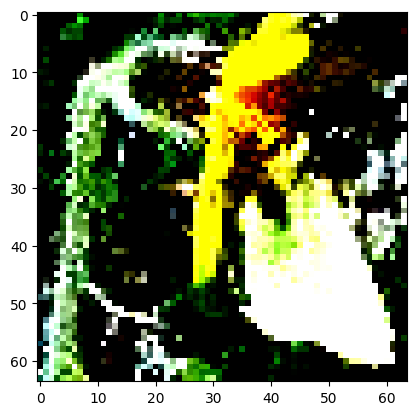

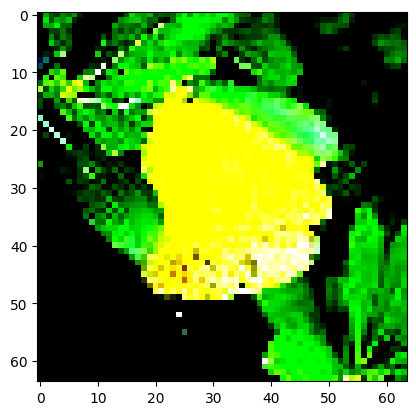

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Тут был совет опираться на семинары, я решила это и сделать, поэтому первое задание во многом - те или иные материалы с пятого семинара, который лежит в гитхабе курса (05_Transfer_Learning,\_Adversarial\_Attacks\_&_Deep_Network_Visualization_solution.ipynb)

И именно поэтому вы видите здесь resnet18 (pretrained=False, естественно)

In [ ]:
from torchvision.models import resnet18

model = resnet18(pretrained=False, num_classes=200).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Тренировочный класс lightning

Код SquirrelNet взят из семинара 4 (04_Optim&Lightning\_solution.ipynb: class SimpleNet(torch.nn.Module)) за исключением момента в \_forward(self, x), потому что у нас готовая непредобученная модель используется. Аналогично со SquirrelModule, код в основе своей тоже из семинара 4 (class SimpleModule(pl.LightningModule)).

Вот тут есть немножко про weight_decay: https://hasty.ai/docs/mp-wiki/solvers-optimizers/weight-decay#:~:text=Typically%2C%20the%20parameter%20for%20weight,might%20not%20be%20powerful%20enough.

А потом я еще гуглила про Tiny ImageNet и нагуглила вот такую статью: http://cs231n.stanford.edu/reports/2017/pdfs/930.pdf. Там и разделы про Impact of Weight Decay есть, и resnet18 там использовался, в общем, очень нужная штука. Я вчиталась, там weight_decay в какой-то момент ставили 0,0002. Последовала их примеру.

Потом я нашла тоже стенфордскую статью по Tiny ImageNet вот тут https://www.semanticscholar.org/paper/Techniques-for-Image-Classification-on-Barnes/45102466ac7c8572afb8278417ef19bedc052599, почитала ее, мне очень помогло. Там уже придерживались weight_decay = 0.0001. И я решила поменять на 0.0001 попробовать. Внутри статьи есть ссылка на гит, где тоже много полезного: https://github.com/fcipollone/TinyImageNet. Scheduler оттуда взят идейно (там говорится про Cyclic learning rates), вот тут еще есть информация: https://hasty.ai/docs/mp-wiki/scheduler/cycliclr. И вот тут: https://github.com/brianmanderson/Cyclical_Learning_Rate. Суть этого scheduler в том, что "Instead of monotonically decreasing the learning rate, this method lets the learning rate cyclically vary between reasonable boundary values. Training with cyclical learning rates instead of fixed values achieves improved classification accuracy without a need to tune and often in fewer iterations." Цитата взята вот отсюда: https://arxiv.org/abs/1506.01186.

В последней статье выше в основном говорится про triangular2 policy, даже приводится в пример табличка с гиперпараметрами (и говорится, что на датасете в статье accuracy в 81.4% достигли за 25000 итераций вместо 70000). Решила взять triangular2. Гиперпараметры для scheduler тоже из статьи взяла почти все. Я потыкала в них на своем tiny датасете, а потом взяла то, что лучше всего себя вело. Вот уже обучение на полном датасете:

In [ ]:
class SquirrelNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(pretrained=False, num_classes=200)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.model(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task = 'multiclass', num_classes = 200)
        return loss

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
class SquirrelModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.save_hyperparameters(ignore=['model'])


    def train_dataloader(self):
        return train_dataloader


    def forward(self, x):
        result = self.model(x)
        return result


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate, weight_decay=0.0001)
        scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0,
                                                      max_lr=0.001,
                                                      step_size_up=3,
                                                      step_size_down=4500,
                                                      verbose=True,
                                                      mode='triangular2',
                                                      cycle_momentum=False
                                                      )
        lr_scheduler_config = {
            "scheduler": scheduler,
            "interval": "step",
            "frequency": 1,
            "monitor": "val_accuracy",
            "strict": True,
            "name": None,
        }
        scheduler_dict = {
            "optimizer" : optimizer,
            "lr_scheduler" : lr_scheduler_config
            }
        return scheduler_dict


    def training_step(self, batch, batch_idx):
        # это все из одного батча
        predictions, loss, acc = self._get_preds_loss_accuracy(batch)
        # добавление wandb:
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        predictions, loss, acc = self._get_preds_loss_accuracy(batch)
        # добавление wandb:
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)
        return predictions


    def _get_preds_loss_accuracy(self, batch):
        # тут получаем predictions, loss, accuracy
        x, y = batch
        predictions = self.model._forward(x)
        loss = self.model(x, y)
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), y.long(), task = 'multiclass', num_classes = 200)
        return predictions, loss, acc

Код отсюда собран: https://docs.wandb.ai/guides/integrations/lightning. Взяла условием для сохранения модели наибольшее значение метрики accuracy на валидации (раздел Model Checkpointing)

In [ ]:
wandb_logger = WandbLogger(project='hw2_Arina', name='first_task', version='resnet18.1', log_model='all')
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')

In [ ]:
from pytorch_lightning.callbacks import Callback


class LogPredictionSamplesCallback(Callback):

    def on_validation_batch_end(self, trainer, pl_module, outputs, batch, batch_idx):
        """Called when the validation batch ends."""
        # `outputs` comes from `LightningModule.validation_step`
        # which corresponds to our model predictions in this case
        # Let's log 20 sample image predictions from the first batch
        if batch_idx == 0:
            n = 20
            x, y = batch
            images = [img for img in x[:n]]
            captions = [f'Ground Truth: {y_i} - Prediction: {y_pred}' for y_i, y_pred in zip(y[:n], outputs[:n])]

            wandb_logger.log_image(
                key='sample_images',
                images=images,
                caption=captions)

log_predictions_callback = LogPredictionSamplesCallback()

Запускаем все:

In [ ]:
model = SquirrelNet().to(device)
wandb_logger.watch(model, log="all")
module = SquirrelModule(model, learning_rate=0.01)

wandb: Currently logged in as: a-zamyshevskaya (mine_nimble). Use `wandb login --relogin` to force relogin


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [ ]:
from pytorch_lightning.tuner import Tuner

trainer = pl.Trainer(logger=wandb_logger, callbacks=[log_predictions_callback, checkpoint_callback], max_epochs=13)

tuner = Tuner(trainer)
tuner.lr_find(module)

trainer.fit(module, train_dataloader, val_dataloader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


Adjusting learning rate of group 0 to 0.0000e+00.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 0.0000e+00.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.3333e-04.
Adjusting learning rate of group 0 to 6.6667e-04.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 9.9978e-04.
Adjusting learning rate of group 0 to 9.9956e-04.
Adjusting learning rate of group 0 to 9.9933e-04.
Adjusting learning rate of group 0 to 9.9911e-04.
Adjusting learning rate of group 0 to 9.9889e-04.
Adjusting learning rate of group 0 to 9.9867e-04.
Adjusting learning rate of group 0 to 9.9844e-04.
Adjusting learning rate of group 0 to 9.9822e-04.
Adjusting learning rate of group 0 to 9.9800e-04.
Adjusting learning rate of group 0 to 9.9778e-04.
Adjusting learning rate of group 0 to 9.9756e-04.
Adjusting learning rate of group 0 to 9.9733e-04.
Adjusting learning rate of group 0 to 9.9711e-04.
Adjusting learning rate of group 0 to 9.9689e-04.
Adjusting learning rate of group 0 to 9.9667e-04.
Adjusting learning rate of group 0 to 9.9644e-04.
Adjusting learning rate of group 0 to 9.9622e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.5311e-04.
Adjusting learning rate of group 0 to 6.5289e-04.
Adjusting learning rate of group 0 to 6.5267e-04.
Adjusting learning rate of group 0 to 6.5244e-04.
Adjusting learning rate of group 0 to 6.5222e-04.
Adjusting learning rate of group 0 to 6.5200e-04.
Adjusting learning rate of group 0 to 6.5178e-04.
Adjusting learning rate of group 0 to 6.5156e-04.
Adjusting learning rate of group 0 to 6.5133e-04.
Adjusting learning rate of group 0 to 6.5111e-04.
Adjusting learning rate of group 0 to 6.5089e-04.
Adjusting learning rate of group 0 to 6.5067e-04.
Adjusting learning rate of group 0 to 6.5044e-04.
Adjusting learning rate of group 0 to 6.5022e-04.
Adjusting learning rate of group 0 to 6.5000e-04.
Adjusting learning rate of group 0 to 6.4978e-04.
Adjusting learning rate of group 0 to 6.4956e-04.
Adjusting learning rate of group 0 to 6.4933e-04.
Adjusting learning rate of group 0 to 6.4911e-04.
Adjusting learning rate of group 0 to 6.4889e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.0578e-04.
Adjusting learning rate of group 0 to 3.0556e-04.
Adjusting learning rate of group 0 to 3.0533e-04.
Adjusting learning rate of group 0 to 3.0511e-04.
Adjusting learning rate of group 0 to 3.0489e-04.
Adjusting learning rate of group 0 to 3.0467e-04.
Adjusting learning rate of group 0 to 3.0444e-04.
Adjusting learning rate of group 0 to 3.0422e-04.
Adjusting learning rate of group 0 to 3.0400e-04.
Adjusting learning rate of group 0 to 3.0378e-04.
Adjusting learning rate of group 0 to 3.0356e-04.
Adjusting learning rate of group 0 to 3.0333e-04.
Adjusting learning rate of group 0 to 3.0311e-04.
Adjusting learning rate of group 0 to 3.0289e-04.
Adjusting learning rate of group 0 to 3.0267e-04.
Adjusting learning rate of group 0 to 3.0244e-04.
Adjusting learning rate of group 0 to 3.0222e-04.
Adjusting learning rate of group 0 to 3.0200e-04.
Adjusting learning rate of group 0 to 3.0178e-04.
Adjusting learning rate of group 0 to 3.0156e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 4.7956e-04.
Adjusting learning rate of group 0 to 4.7944e-04.
Adjusting learning rate of group 0 to 4.7933e-04.
Adjusting learning rate of group 0 to 4.7922e-04.
Adjusting learning rate of group 0 to 4.7911e-04.
Adjusting learning rate of group 0 to 4.7900e-04.
Adjusting learning rate of group 0 to 4.7889e-04.
Adjusting learning rate of group 0 to 4.7878e-04.
Adjusting learning rate of group 0 to 4.7867e-04.
Adjusting learning rate of group 0 to 4.7856e-04.
Adjusting learning rate of group 0 to 4.7844e-04.
Adjusting learning rate of group 0 to 4.7833e-04.
Adjusting learning rate of group 0 to 4.7822e-04.
Adjusting learning rate of group 0 to 4.7811e-04.
Adjusting learning rate of group 0 to 4.7800e-04.
Adjusting learning rate of group 0 to 4.7789e-04.
Adjusting learning rate of group 0 to 4.7778e-04.
Adjusting learning rate of group 0 to 4.7767e-04.
Adjusting learning rate of group 0 to 4.7756e-04.
Adjusting learning rate of group 0 to 4.7744e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.0589e-04.
Adjusting learning rate of group 0 to 3.0578e-04.
Adjusting learning rate of group 0 to 3.0567e-04.
Adjusting learning rate of group 0 to 3.0556e-04.
Adjusting learning rate of group 0 to 3.0544e-04.
Adjusting learning rate of group 0 to 3.0533e-04.
Adjusting learning rate of group 0 to 3.0522e-04.
Adjusting learning rate of group 0 to 3.0511e-04.
Adjusting learning rate of group 0 to 3.0500e-04.
Adjusting learning rate of group 0 to 3.0489e-04.
Adjusting learning rate of group 0 to 3.0478e-04.
Adjusting learning rate of group 0 to 3.0467e-04.
Adjusting learning rate of group 0 to 3.0456e-04.
Adjusting learning rate of group 0 to 3.0444e-04.
Adjusting learning rate of group 0 to 3.0433e-04.
Adjusting learning rate of group 0 to 3.0422e-04.
Adjusting learning rate of group 0 to 3.0411e-04.
Adjusting learning rate of group 0 to 3.0400e-04.
Adjusting learning rate of group 0 to 3.0389e-04.
Adjusting learning rate of group 0 to 3.0378e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.3222e-04.
Adjusting learning rate of group 0 to 1.3211e-04.
Adjusting learning rate of group 0 to 1.3200e-04.
Adjusting learning rate of group 0 to 1.3189e-04.
Adjusting learning rate of group 0 to 1.3178e-04.
Adjusting learning rate of group 0 to 1.3167e-04.
Adjusting learning rate of group 0 to 1.3156e-04.
Adjusting learning rate of group 0 to 1.3144e-04.
Adjusting learning rate of group 0 to 1.3133e-04.
Adjusting learning rate of group 0 to 1.3122e-04.
Adjusting learning rate of group 0 to 1.3111e-04.
Adjusting learning rate of group 0 to 1.3100e-04.
Adjusting learning rate of group 0 to 1.3089e-04.
Adjusting learning rate of group 0 to 1.3078e-04.
Adjusting learning rate of group 0 to 1.3067e-04.
Adjusting learning rate of group 0 to 1.3056e-04.
Adjusting learning rate of group 0 to 1.3044e-04.
Adjusting learning rate of group 0 to 1.3033e-04.
Adjusting learning rate of group 0 to 1.3022e-04.
Adjusting learning rate of group 0 to 1.3011e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.2944e-04.
Adjusting learning rate of group 0 to 2.2939e-04.
Adjusting learning rate of group 0 to 2.2933e-04.
Adjusting learning rate of group 0 to 2.2928e-04.
Adjusting learning rate of group 0 to 2.2922e-04.
Adjusting learning rate of group 0 to 2.2917e-04.
Adjusting learning rate of group 0 to 2.2911e-04.
Adjusting learning rate of group 0 to 2.2906e-04.
Adjusting learning rate of group 0 to 2.2900e-04.
Adjusting learning rate of group 0 to 2.2894e-04.
Adjusting learning rate of group 0 to 2.2889e-04.
Adjusting learning rate of group 0 to 2.2883e-04.
Adjusting learning rate of group 0 to 2.2878e-04.
Adjusting learning rate of group 0 to 2.2872e-04.
Adjusting learning rate of group 0 to 2.2867e-04.
Adjusting learning rate of group 0 to 2.2861e-04.
Adjusting learning rate of group 0 to 2.2856e-04.
Adjusting learning rate of group 0 to 2.2850e-04.
Adjusting learning rate of group 0 to 2.2844e-04.
Adjusting learning rate of group 0 to 2.2839e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.4261e-04.
Adjusting learning rate of group 0 to 1.4256e-04.
Adjusting learning rate of group 0 to 1.4250e-04.
Adjusting learning rate of group 0 to 1.4244e-04.
Adjusting learning rate of group 0 to 1.4239e-04.
Adjusting learning rate of group 0 to 1.4233e-04.
Adjusting learning rate of group 0 to 1.4228e-04.
Adjusting learning rate of group 0 to 1.4222e-04.
Adjusting learning rate of group 0 to 1.4217e-04.
Adjusting learning rate of group 0 to 1.4211e-04.
Adjusting learning rate of group 0 to 1.4206e-04.
Adjusting learning rate of group 0 to 1.4200e-04.
Adjusting learning rate of group 0 to 1.4194e-04.
Adjusting learning rate of group 0 to 1.4189e-04.
Adjusting learning rate of group 0 to 1.4183e-04.
Adjusting learning rate of group 0 to 1.4178e-04.
Adjusting learning rate of group 0 to 1.4172e-04.
Adjusting learning rate of group 0 to 1.4167e-04.
Adjusting learning rate of group 0 to 1.4161e-04.
Adjusting learning rate of group 0 to 1.4156e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.5778e-05.
Adjusting learning rate of group 0 to 5.5722e-05.
Adjusting learning rate of group 0 to 5.5667e-05.
Adjusting learning rate of group 0 to 5.5611e-05.
Adjusting learning rate of group 0 to 5.5556e-05.
Adjusting learning rate of group 0 to 5.5500e-05.
Adjusting learning rate of group 0 to 5.5444e-05.
Adjusting learning rate of group 0 to 5.5389e-05.
Adjusting learning rate of group 0 to 5.5333e-05.
Adjusting learning rate of group 0 to 5.5278e-05.
Adjusting learning rate of group 0 to 5.5222e-05.
Adjusting learning rate of group 0 to 5.5167e-05.
Adjusting learning rate of group 0 to 5.5111e-05.
Adjusting learning rate of group 0 to 5.5056e-05.
Adjusting learning rate of group 0 to 5.5000e-05.
Adjusting learning rate of group 0 to 5.4944e-05.
Adjusting learning rate of group 0 to 5.4889e-05.
Adjusting learning rate of group 0 to 5.4833e-05.
Adjusting learning rate of group 0 to 5.4778e-05.
Adjusting learning rate of group 0 to 5.4722e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0956e-04.
Adjusting learning rate of group 0 to 1.0953e-04.
Adjusting learning rate of group 0 to 1.0950e-04.
Adjusting learning rate of group 0 to 1.0947e-04.
Adjusting learning rate of group 0 to 1.0944e-04.
Adjusting learning rate of group 0 to 1.0942e-04.
Adjusting learning rate of group 0 to 1.0939e-04.
Adjusting learning rate of group 0 to 1.0936e-04.
Adjusting learning rate of group 0 to 1.0933e-04.
Adjusting learning rate of group 0 to 1.0931e-04.
Adjusting learning rate of group 0 to 1.0928e-04.
Adjusting learning rate of group 0 to 1.0925e-04.
Adjusting learning rate of group 0 to 1.0922e-04.
Adjusting learning rate of group 0 to 1.0919e-04.
Adjusting learning rate of group 0 to 1.0917e-04.
Adjusting learning rate of group 0 to 1.0914e-04.
Adjusting learning rate of group 0 to 1.0911e-04.
Adjusting learning rate of group 0 to 1.0908e-04.
Adjusting learning rate of group 0 to 1.0906e-04.
Adjusting learning rate of group 0 to 1.0903e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.6139e-05.
Adjusting learning rate of group 0 to 6.6111e-05.
Adjusting learning rate of group 0 to 6.6083e-05.
Adjusting learning rate of group 0 to 6.6056e-05.
Adjusting learning rate of group 0 to 6.6028e-05.
Adjusting learning rate of group 0 to 6.6000e-05.
Adjusting learning rate of group 0 to 6.5972e-05.
Adjusting learning rate of group 0 to 6.5944e-05.
Adjusting learning rate of group 0 to 6.5917e-05.
Adjusting learning rate of group 0 to 6.5889e-05.
Adjusting learning rate of group 0 to 6.5861e-05.
Adjusting learning rate of group 0 to 6.5833e-05.
Adjusting learning rate of group 0 to 6.5806e-05.
Adjusting learning rate of group 0 to 6.5778e-05.
Adjusting learning rate of group 0 to 6.5750e-05.
Adjusting learning rate of group 0 to 6.5722e-05.
Adjusting learning rate of group 0 to 6.5694e-05.
Adjusting learning rate of group 0 to 6.5667e-05.
Adjusting learning rate of group 0 to 6.5639e-05.
Adjusting learning rate of group 0 to 6.5611e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.2722e-05.
Adjusting learning rate of group 0 to 2.2694e-05.
Adjusting learning rate of group 0 to 2.2667e-05.
Adjusting learning rate of group 0 to 2.2639e-05.
Adjusting learning rate of group 0 to 2.2611e-05.
Adjusting learning rate of group 0 to 2.2583e-05.
Adjusting learning rate of group 0 to 2.2556e-05.
Adjusting learning rate of group 0 to 2.2528e-05.
Adjusting learning rate of group 0 to 2.2500e-05.
Adjusting learning rate of group 0 to 2.2472e-05.
Adjusting learning rate of group 0 to 2.2444e-05.
Adjusting learning rate of group 0 to 2.2417e-05.
Adjusting learning rate of group 0 to 2.2389e-05.
Adjusting learning rate of group 0 to 2.2361e-05.
Adjusting learning rate of group 0 to 2.2333e-05.
Adjusting learning rate of group 0 to 2.2306e-05.
Adjusting learning rate of group 0 to 2.2278e-05.
Adjusting learning rate of group 0 to 2.2250e-05.
Adjusting learning rate of group 0 to 2.2222e-05.
Adjusting learning rate of group 0 to 2.2194e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.2194e-05.
Adjusting learning rate of group 0 to 5.2181e-05.
Adjusting learning rate of group 0 to 5.2167e-05.
Adjusting learning rate of group 0 to 5.2153e-05.
Adjusting learning rate of group 0 to 5.2139e-05.
Adjusting learning rate of group 0 to 5.2125e-05.
Adjusting learning rate of group 0 to 5.2111e-05.
Adjusting learning rate of group 0 to 5.2097e-05.
Adjusting learning rate of group 0 to 5.2083e-05.
Adjusting learning rate of group 0 to 5.2069e-05.
Adjusting learning rate of group 0 to 5.2056e-05.
Adjusting learning rate of group 0 to 5.2042e-05.
Adjusting learning rate of group 0 to 5.2028e-05.
Adjusting learning rate of group 0 to 5.2014e-05.
Adjusting learning rate of group 0 to 5.2000e-05.
Adjusting learning rate of group 0 to 5.1986e-05.
Adjusting learning rate of group 0 to 5.1972e-05.
Adjusting learning rate of group 0 to 5.1958e-05.
Adjusting learning rate of group 0 to 5.1944e-05.
Adjusting learning rate of group 0 to 5.1931e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_task(model, test_dataloader, device):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            pred = model._forward(images)
            pred_classes = torch.argmax(pred, dim=-1)
            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

accuracy_counted = evaluate_task(model, val_dataloader, device)

100%|██████████| 157/157 [00:03<00:00, 47.07it/s]


In [ ]:
print(accuracy_counted)

0.4029


### Валидация результатов задания

In [ ]:
print(f"Оценка за это задание составит {np.clip(10 * accuracy_counted / 0.44, 0, 10):.2f} баллов")

Оценка за это задание составит 9.16 баллов


Так, ну... Модель уже хорошая, на мой взгляд... Выдает 0.4029. Вот тут под названием 'first_task' лежат графики: https://wandb.ai/mine_nimble/hw2_Arina.
А модель нужно добить в таком случае.

In [ ]:
wandb.finish()

Дальше делаем вот что. Я загружаю модель из чекпоинта и буду ее дообучать. Так можно, потому что сами все делали

In [ ]:
run = wandb.init()
artifact = run.use_artifact('mine_nimble/hw2_Arina/model-resnet18.1:v10', type='model')
artifact_dir = artifact.download()

wandb: Downloading large artifact model-resnet18.1:v10, 129.21MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.2


In [ ]:
wandb.finish()

In [ ]:
add_model = SquirrelNet().to(device)
saved_model = SquirrelModule.load_from_checkpoint('/kaggle/working/artifacts/model-resnet18.1:v10/model.ckpt', model=add_model, pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
wandb_logger = WandbLogger(project='hw2_Arina', name='additional_first_task', version='resnet18.2', log_model='all')
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
wandb_logger.watch(saved_model, log="all")

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [ ]:
add_trainer = pl.Trainer(logger=wandb_logger, callbacks=[log_predictions_callback, checkpoint_callback], max_epochs=11)
add_trainer.fit(saved_model, train_dataloader, val_dataloader)

Adjusting learning rate of group 0 to 0.0000e+00.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.3333e-04.
Adjusting learning rate of group 0 to 6.6667e-04.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 9.9978e-04.
Adjusting learning rate of group 0 to 9.9956e-04.
Adjusting learning rate of group 0 to 9.9933e-04.
Adjusting learning rate of group 0 to 9.9911e-04.
Adjusting learning rate of group 0 to 9.9889e-04.
Adjusting learning rate of group 0 to 9.9867e-04.
Adjusting learning rate of group 0 to 9.9844e-04.
Adjusting learning rate of group 0 to 9.9822e-04.
Adjusting learning rate of group 0 to 9.9800e-04.
Adjusting learning rate of group 0 to 9.9778e-04.
Adjusting learning rate of group 0 to 9.9756e-04.
Adjusting learning rate of group 0 to 9.9733e-04.
Adjusting learning rate of group 0 to 9.9711e-04.
Adjusting learning rate of group 0 to 9.9689e-04.
Adjusting learning rate of group 0 to 9.9667e-04.
Adjusting learning rate of group 0 to 9.9644e-04.
Adjusting learning rate of group 0 to 9.9622e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.5311e-04.
Adjusting learning rate of group 0 to 6.5289e-04.
Adjusting learning rate of group 0 to 6.5267e-04.
Adjusting learning rate of group 0 to 6.5244e-04.
Adjusting learning rate of group 0 to 6.5222e-04.
Adjusting learning rate of group 0 to 6.5200e-04.
Adjusting learning rate of group 0 to 6.5178e-04.
Adjusting learning rate of group 0 to 6.5156e-04.
Adjusting learning rate of group 0 to 6.5133e-04.
Adjusting learning rate of group 0 to 6.5111e-04.
Adjusting learning rate of group 0 to 6.5089e-04.
Adjusting learning rate of group 0 to 6.5067e-04.
Adjusting learning rate of group 0 to 6.5044e-04.
Adjusting learning rate of group 0 to 6.5022e-04.
Adjusting learning rate of group 0 to 6.5000e-04.
Adjusting learning rate of group 0 to 6.4978e-04.
Adjusting learning rate of group 0 to 6.4956e-04.
Adjusting learning rate of group 0 to 6.4933e-04.
Adjusting learning rate of group 0 to 6.4911e-04.
Adjusting learning rate of group 0 to 6.4889e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.0578e-04.
Adjusting learning rate of group 0 to 3.0556e-04.
Adjusting learning rate of group 0 to 3.0533e-04.
Adjusting learning rate of group 0 to 3.0511e-04.
Adjusting learning rate of group 0 to 3.0489e-04.
Adjusting learning rate of group 0 to 3.0467e-04.
Adjusting learning rate of group 0 to 3.0444e-04.
Adjusting learning rate of group 0 to 3.0422e-04.
Adjusting learning rate of group 0 to 3.0400e-04.
Adjusting learning rate of group 0 to 3.0378e-04.
Adjusting learning rate of group 0 to 3.0356e-04.
Adjusting learning rate of group 0 to 3.0333e-04.
Adjusting learning rate of group 0 to 3.0311e-04.
Adjusting learning rate of group 0 to 3.0289e-04.
Adjusting learning rate of group 0 to 3.0267e-04.
Adjusting learning rate of group 0 to 3.0244e-04.
Adjusting learning rate of group 0 to 3.0222e-04.
Adjusting learning rate of group 0 to 3.0200e-04.
Adjusting learning rate of group 0 to 3.0178e-04.
Adjusting learning rate of group 0 to 3.0156e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 4.7956e-04.
Adjusting learning rate of group 0 to 4.7944e-04.
Adjusting learning rate of group 0 to 4.7933e-04.
Adjusting learning rate of group 0 to 4.7922e-04.
Adjusting learning rate of group 0 to 4.7911e-04.
Adjusting learning rate of group 0 to 4.7900e-04.
Adjusting learning rate of group 0 to 4.7889e-04.
Adjusting learning rate of group 0 to 4.7878e-04.
Adjusting learning rate of group 0 to 4.7867e-04.
Adjusting learning rate of group 0 to 4.7856e-04.
Adjusting learning rate of group 0 to 4.7844e-04.
Adjusting learning rate of group 0 to 4.7833e-04.
Adjusting learning rate of group 0 to 4.7822e-04.
Adjusting learning rate of group 0 to 4.7811e-04.
Adjusting learning rate of group 0 to 4.7800e-04.
Adjusting learning rate of group 0 to 4.7789e-04.
Adjusting learning rate of group 0 to 4.7778e-04.
Adjusting learning rate of group 0 to 4.7767e-04.
Adjusting learning rate of group 0 to 4.7756e-04.
Adjusting learning rate of group 0 to 4.7744e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.0589e-04.
Adjusting learning rate of group 0 to 3.0578e-04.
Adjusting learning rate of group 0 to 3.0567e-04.
Adjusting learning rate of group 0 to 3.0556e-04.
Adjusting learning rate of group 0 to 3.0544e-04.
Adjusting learning rate of group 0 to 3.0533e-04.
Adjusting learning rate of group 0 to 3.0522e-04.
Adjusting learning rate of group 0 to 3.0511e-04.
Adjusting learning rate of group 0 to 3.0500e-04.
Adjusting learning rate of group 0 to 3.0489e-04.
Adjusting learning rate of group 0 to 3.0478e-04.
Adjusting learning rate of group 0 to 3.0467e-04.
Adjusting learning rate of group 0 to 3.0456e-04.
Adjusting learning rate of group 0 to 3.0444e-04.
Adjusting learning rate of group 0 to 3.0433e-04.
Adjusting learning rate of group 0 to 3.0422e-04.
Adjusting learning rate of group 0 to 3.0411e-04.
Adjusting learning rate of group 0 to 3.0400e-04.
Adjusting learning rate of group 0 to 3.0389e-04.
Adjusting learning rate of group 0 to 3.0378e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.3222e-04.
Adjusting learning rate of group 0 to 1.3211e-04.
Adjusting learning rate of group 0 to 1.3200e-04.
Adjusting learning rate of group 0 to 1.3189e-04.
Adjusting learning rate of group 0 to 1.3178e-04.
Adjusting learning rate of group 0 to 1.3167e-04.
Adjusting learning rate of group 0 to 1.3156e-04.
Adjusting learning rate of group 0 to 1.3144e-04.
Adjusting learning rate of group 0 to 1.3133e-04.
Adjusting learning rate of group 0 to 1.3122e-04.
Adjusting learning rate of group 0 to 1.3111e-04.
Adjusting learning rate of group 0 to 1.3100e-04.
Adjusting learning rate of group 0 to 1.3089e-04.
Adjusting learning rate of group 0 to 1.3078e-04.
Adjusting learning rate of group 0 to 1.3067e-04.
Adjusting learning rate of group 0 to 1.3056e-04.
Adjusting learning rate of group 0 to 1.3044e-04.
Adjusting learning rate of group 0 to 1.3033e-04.
Adjusting learning rate of group 0 to 1.3022e-04.
Adjusting learning rate of group 0 to 1.3011e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.2944e-04.
Adjusting learning rate of group 0 to 2.2939e-04.
Adjusting learning rate of group 0 to 2.2933e-04.
Adjusting learning rate of group 0 to 2.2928e-04.
Adjusting learning rate of group 0 to 2.2922e-04.
Adjusting learning rate of group 0 to 2.2917e-04.
Adjusting learning rate of group 0 to 2.2911e-04.
Adjusting learning rate of group 0 to 2.2906e-04.
Adjusting learning rate of group 0 to 2.2900e-04.
Adjusting learning rate of group 0 to 2.2894e-04.
Adjusting learning rate of group 0 to 2.2889e-04.
Adjusting learning rate of group 0 to 2.2883e-04.
Adjusting learning rate of group 0 to 2.2878e-04.
Adjusting learning rate of group 0 to 2.2872e-04.
Adjusting learning rate of group 0 to 2.2867e-04.
Adjusting learning rate of group 0 to 2.2861e-04.
Adjusting learning rate of group 0 to 2.2856e-04.
Adjusting learning rate of group 0 to 2.2850e-04.
Adjusting learning rate of group 0 to 2.2844e-04.
Adjusting learning rate of group 0 to 2.2839e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.4261e-04.
Adjusting learning rate of group 0 to 1.4256e-04.
Adjusting learning rate of group 0 to 1.4250e-04.
Adjusting learning rate of group 0 to 1.4244e-04.
Adjusting learning rate of group 0 to 1.4239e-04.
Adjusting learning rate of group 0 to 1.4233e-04.
Adjusting learning rate of group 0 to 1.4228e-04.
Adjusting learning rate of group 0 to 1.4222e-04.
Adjusting learning rate of group 0 to 1.4217e-04.
Adjusting learning rate of group 0 to 1.4211e-04.
Adjusting learning rate of group 0 to 1.4206e-04.
Adjusting learning rate of group 0 to 1.4200e-04.
Adjusting learning rate of group 0 to 1.4194e-04.
Adjusting learning rate of group 0 to 1.4189e-04.
Adjusting learning rate of group 0 to 1.4183e-04.
Adjusting learning rate of group 0 to 1.4178e-04.
Adjusting learning rate of group 0 to 1.4172e-04.
Adjusting learning rate of group 0 to 1.4167e-04.
Adjusting learning rate of group 0 to 1.4161e-04.
Adjusting learning rate of group 0 to 1.4156e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.5778e-05.
Adjusting learning rate of group 0 to 5.5722e-05.
Adjusting learning rate of group 0 to 5.5667e-05.
Adjusting learning rate of group 0 to 5.5611e-05.
Adjusting learning rate of group 0 to 5.5556e-05.
Adjusting learning rate of group 0 to 5.5500e-05.
Adjusting learning rate of group 0 to 5.5444e-05.
Adjusting learning rate of group 0 to 5.5389e-05.
Adjusting learning rate of group 0 to 5.5333e-05.
Adjusting learning rate of group 0 to 5.5278e-05.
Adjusting learning rate of group 0 to 5.5222e-05.
Adjusting learning rate of group 0 to 5.5167e-05.
Adjusting learning rate of group 0 to 5.5111e-05.
Adjusting learning rate of group 0 to 5.5056e-05.
Adjusting learning rate of group 0 to 5.5000e-05.
Adjusting learning rate of group 0 to 5.4944e-05.
Adjusting learning rate of group 0 to 5.4889e-05.
Adjusting learning rate of group 0 to 5.4833e-05.
Adjusting learning rate of group 0 to 5.4778e-05.
Adjusting learning rate of group 0 to 5.4722e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0956e-04.
Adjusting learning rate of group 0 to 1.0953e-04.
Adjusting learning rate of group 0 to 1.0950e-04.
Adjusting learning rate of group 0 to 1.0947e-04.
Adjusting learning rate of group 0 to 1.0944e-04.
Adjusting learning rate of group 0 to 1.0942e-04.
Adjusting learning rate of group 0 to 1.0939e-04.
Adjusting learning rate of group 0 to 1.0936e-04.
Adjusting learning rate of group 0 to 1.0933e-04.
Adjusting learning rate of group 0 to 1.0931e-04.
Adjusting learning rate of group 0 to 1.0928e-04.
Adjusting learning rate of group 0 to 1.0925e-04.
Adjusting learning rate of group 0 to 1.0922e-04.
Adjusting learning rate of group 0 to 1.0919e-04.
Adjusting learning rate of group 0 to 1.0917e-04.
Adjusting learning rate of group 0 to 1.0914e-04.
Adjusting learning rate of group 0 to 1.0911e-04.
Adjusting learning rate of group 0 to 1.0908e-04.
Adjusting learning rate of group 0 to 1.0906e-04.
Adjusting learning rate of group 0 to 1.0903e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.6139e-05.
Adjusting learning rate of group 0 to 6.6111e-05.
Adjusting learning rate of group 0 to 6.6083e-05.
Adjusting learning rate of group 0 to 6.6056e-05.
Adjusting learning rate of group 0 to 6.6028e-05.
Adjusting learning rate of group 0 to 6.6000e-05.
Adjusting learning rate of group 0 to 6.5972e-05.
Adjusting learning rate of group 0 to 6.5944e-05.
Adjusting learning rate of group 0 to 6.5917e-05.
Adjusting learning rate of group 0 to 6.5889e-05.
Adjusting learning rate of group 0 to 6.5861e-05.
Adjusting learning rate of group 0 to 6.5833e-05.
Adjusting learning rate of group 0 to 6.5806e-05.
Adjusting learning rate of group 0 to 6.5778e-05.
Adjusting learning rate of group 0 to 6.5750e-05.
Adjusting learning rate of group 0 to 6.5722e-05.
Adjusting learning rate of group 0 to 6.5694e-05.
Adjusting learning rate of group 0 to 6.5667e-05.
Adjusting learning rate of group 0 to 6.5639e-05.
Adjusting learning rate of group 0 to 6.5611e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
add_new_model = add_model.to(device)
accuracy_new = evaluate_task(add_new_model, val_dataloader, device)

100%|██████████| 157/157 [00:03<00:00, 46.72it/s]


In [ ]:
print(accuracy_new)

0.4474


In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇████
train_accuracy,▃▄▂▂▁▂▂▄▃▄▄▃▃▄▄▆▃▃▄▆▆▅▄▆▅▆▆▅▆▅▅█▅▆▅▆▅▆▅▇
train_loss,▆▆▆▇█▇▆▆▇▆▆▅▅▅▅▄▆▆▅▂▄▄▅▄▄▃▂▃▂▂▃▁▃▂▃▂▃▂▃▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▄▃▅▇▆▇█▇██
val_loss,█▅▅▄▂▂▂▁▂▁▁
epoch,10
train_accuracy,0.59375
train_loss,1.63653
trainer/global_step,17192
val_accuracy,0.4474


In [ ]:
print(f"Оценка за это задание составит {np.clip(10 * accuracy_new / 0.44, 0, 10):.2f} баллов")

Оценка за это задание составит 10.00 баллов


Оно!

#### Получилось 0.4474. "Оценка за это задание составит 10.00 баллов"

Кайф! Вот тут https://wandb.ai/mine_nimble/hw2_Arina под названием 'additional_first_task' лежат графики.

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

Сначала я думала взять ResNet, но потом поняла, что не стоит, да и Филипп на семинаре не советовал трогать ее в этом задании, поэтому я пошла гуглить, что сейчас вообще есть и чем можно воспользоваться. На Хабре нашла статью: https://habr.com/ru/articles/666314/. Не у всех вариантов было хорошее описание, в итоге я замучилась и сделала поиск по страничке "соврем". На удивление, это слово встречалось только в описании 12. Группа сетей ConvNeXt. Загуглила ConvNeXt. Второй в выдаче стояла вот эта статья: https://arxiv.org/abs/2201.03545. И она потрясающая! Авторы подробно рассказывают, какие гиперпараметры брали, что делали. Единственное, с ConvNet, которая в этот статье описана, придется делать операцию по изменению последнего слоя, потому что в нем 1000 выходов, а у нас всего 200 классов. В общем, взяла ConvNet, гиперпараметры подобрала по рекомендациям авторов. Очень полезны Training on ImageNet-1K и Fine-tuning on ImageNet-1K, оттуда взяты и CosineAnnealingLR, и weight_decay = 1e-8. Вот тут есть про T-max: https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-learning-rate-schedules#9. Я вроде бы определила, что раз про T-max говорится, что "This parameter accepts integer specifying a maximum number of iterations (epochs/batches) over which to anneal learning rate", то в моему случае T-max должен быть равен len(train_dataloader).

In [ ]:
from torchvision.models import convnext_base, ConvNeXt_Base_Weights

Кое-что в том, как мы создаем датасет, тоже надо было менять, поменяла:

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE - cool

train_transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.AutoAugment(T.AutoAugmentPolicy.IMAGENET),
    ConvNeXt_Base_Weights.IMAGENET1K_V1.transforms() # вместо нормализации, которую раньше делали
])

val_transform = T.Compose([
    ConvNeXt_Base_Weights.IMAGENET1K_V1.transforms()
])

train_dataset = ImageFolder('/kaggle/working/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/working/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=512, shuffle=False, num_workers=4)

In [ ]:
len(train_dataloader)

196

In [ ]:
model = convnext_base(weights=ConvNeXt_Base_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth
100%|██████████| 338M/338M [00:01<00:00, 316MB/s]  


In [ ]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

In [ ]:
class SquirrelConvNeXt(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = convnext_base(weights=ConvNeXt_Base_Weights.IMAGENET1K_V1)
        # вот ту изменение последнего линейного слоя:
        self.model.classifier[2] = nn.Identity()
        self.myclassifier = nn.Linear(in_features=1024, out_features=200, bias=True)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        with torch.no_grad():
            features = self.model(x)
        predictions = self.myclassifier(features)
        return predictions

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            prediction = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, prediction.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task = 'multiclass', num_classes = 200)
        return loss

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [ ]:
class SquirrelConvModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.save_hyperparameters(ignore=['model'])


    def train_dataloader(self):
        return train_dataloader


    def forward(self, x):
        result = self.model(x)
        return result


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.myclassifier.parameters(), lr=self.learning_rate, weight_decay=1e-8)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=196, eta_min=0)

        lr_scheduler_config = {
            "scheduler": scheduler,
            "interval": "step",
            "frequency": 1,
            "monitor": "val_accuracy",
            "strict": True,
            "name": None,
        }
        scheduler_dict = {
            "optimizer" : optimizer,
            "lr_scheduler" : lr_scheduler_config
            }
        return scheduler_dict

    def training_step(self, batch, batch_idx):
        # это все из одного батча
        predictions, loss, acc = self._get_preds_loss_accuracy(batch)
        # добавление wandb:
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        predictions, loss, acc = self._get_preds_loss_accuracy(batch)
        # добавление wandb:
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)
        return predictions

    def _get_preds_loss_accuracy(self, batch):
        # тут получаем predictions, loss, accuracy
        x, y = batch
        predictions = self.model._forward(x)
        loss = self.model(x, y)
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), y.long(), task = 'multiclass', num_classes = 200)
        return predictions, loss, acc

In [ ]:
wandb_logger = WandbLogger(project='hw2_Arina', name='second_task', version='convnext1', log_model='all')
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')

In [ ]:
model = SquirrelConvNeXt().to(device)
wandb_logger.watch(model, log="all")
module = SquirrelConvModule(model, learning_rate=5e-5)

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [ ]:
trainer = pl.Trainer(
    logger=wandb_logger,
    callbacks=[log_predictions_callback, checkpoint_callback],
    max_epochs=3,
    accelerator="auto"
)

In [ ]:
from pytorch_lightning.tuner import Tuner

tuner = Tuner(trainer)
tuner.lr_find(module, update_attr=True)
module.learning_rate

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

0.030199517204020192

In [ ]:
module.learning_rate = 0.030199517204020192

In [ ]:
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▅▅▅▅▅█████
train_accuracy,▅▃▁▇▇█▁▃▄▅▇
train_loss,▆▆▄▃▁▃██▇▅▄
trainer/global_step,▁▂▂▂▃▃▄▄▅▅▅▆▆▇███
val_accuracy,█▁█
val_loss,▁█▃
epoch,2
train_accuracy,0.67383
train_loss,1.77844
trainer/global_step,587
val_accuracy,0.8413


Графики для этого задания лежат в 'second_task' вот тут: https://wandb.ai/mine_nimble/hw2_Arina

### Валидация результатов задания

In [ ]:
model = model.to(device)

accuracy_second_task = evaluate_task(model, val_dataloader, device)
print(accuracy_second_task)


100%|██████████| 20/20 [01:49<00:00,  5.48s/it]


0.8413


In [ ]:
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_second_task - 0.5) / 0.34, 0, 10):.2f} баллов")

Оценка за это задание составит 10.00 баллов


Ураааааааааааааааааааааааааааааааааааа! Оно сделалось!

#### Accuracy = 0.8413

Я в итоге делала все на kaggle, потому что мощностей больше, чем в коллабе. И ушло на домашку ужасно много времени. Но, что важно, чтение статей правда помогает делать все гораздо эффективнее! Во второй модели мне даже не пришлось особо подбирать гиперпараметры, а это так приятно)

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспериментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Простите, пожалуйста, я текст писала по ходу работы с моделями, потому что там гораздо удобнее и логичнее, так что, получается, отчет выше вместе с обучением. Но вот еще раз ссылочка на wandb: https://wandb.ai/mine_nimble/hw2_Arina.

Оба задания у меня получились выполненными на 10, чему я очень рада.